In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt

In [21]:
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
from google.colab import drive

drive.mount('/content/drive')
file_pth="/content/drive/MyDrive/dataset/flipkart_com-ecommerce_sample.csv"
df=pd.read_csv(file_pth)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Exploratory Data Analysis**

In [23]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


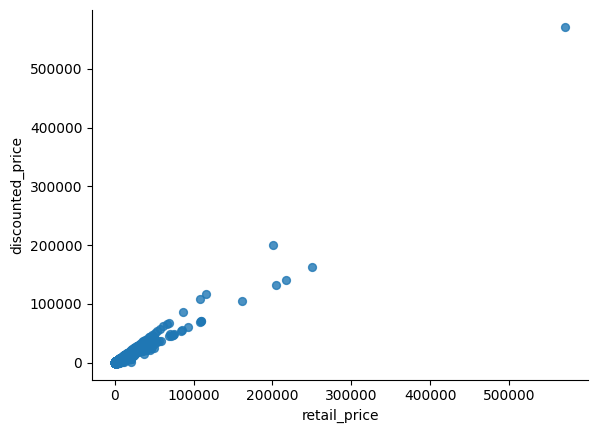

In [24]:
# @title retail_price vs discounted_price

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='retail_price', y='discounted_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

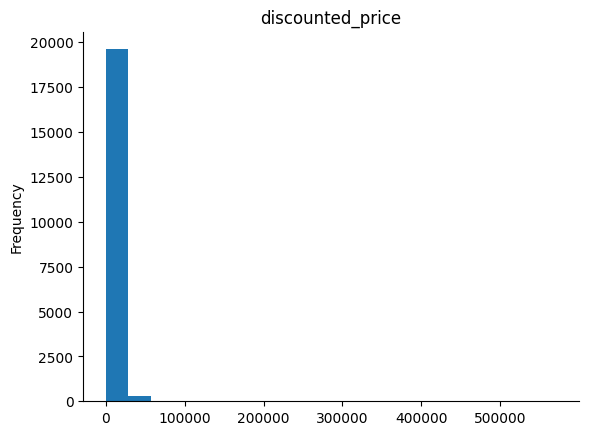

In [25]:
# title discounted_price

from matplotlib import pyplot as plt
df['discounted_price'].plot(kind='hist', bins=20, title='discounted_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [26]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')
print(df.columns)

The dataset contains 20002 rows and 15 columns.
Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')


In [27]:
df.dtypes

,0
uniq_id,object
crawl_timestamp,object
product_url,object
product_name,object
product_category_tree,object
pid,object
retail_price,float64
discounted_price,float64
image,object
is_FK_Advantage_product,object


In [28]:
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [29]:
# Analyze categorical columns
print(df['product_category_tree'].value_counts().head(10))
print(df['brand'].value_counts().head(10))

product_category_tree
["Jewellery >> Necklaces & Chains >> Necklaces"]                                                       1567
["Jewellery >> Rings"]                                                                                  710
["Automotive >> Accessories & Spare parts >> Car Interior & Exterior >> Car Interior >> Car Mats"]      522
["Jewellery >> Bangles, Bracelets & Armlets >> Bangles"]                                                430
["Tools & Hardware >> Tools >> Gardening Tools >> Plant Containers & Sets >> Plant Container Sets"]     332
["Jewellery >> Bangles, Bracelets & Armlets >> Bracelets"]                                              251
["Mobiles & Accessories >> Tablet Accessories >> Cases & Covers >> TheLostPuppy Cases & Covers"]        229
["Clothing >> Women's Clothing >> Lingerie, Sleep & Swimwear >> Bras >> S4S Bras"]                      197
["Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars"]                                           190
["Foot

**Statistical summary of the data**

In [30]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
uniq_id,20000,20000,c2d766ca982eca8304150849735ffef9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
crawl_timestamp,20000,371,2015-12-01 12:40:44 +0000,1979,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_url,20000,20000,http://www.flipkart.com/alisha-solid-women-s-c...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name,20000,12676,TheLostPuppy Back Cover for Apple iPad Air,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_tree,20000,6466,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",1567,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pid,20000,19998,JEAEGE8Q8GXYFTGU,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retail_price,19922.0,NaN,NaN,NaN,2979.206104,9009.639341,35.0,666.0,1040.0,1999.0,571230.0
discounted_price,19922.0,NaN,NaN,NaN,1973.401767,7333.58604,35.0,350.0,550.0,999.0,571230.0
image,19997,18589,"[""http://img6a.flixcart.com/image/car-mat/m/t/...",45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_FK_Advantage_product,20000,2,False,19215,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
df.shape

(20002, 15)

**Checking for any missing values**

In [32]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

uniq_id                       2
crawl_timestamp               2
product_url                   2
product_name                  2
product_category_tree         2
pid                           2
retail_price                 80
discounted_price             80
image                         5
is_FK_Advantage_product       2
description                   4
product_rating                2
overall_rating                2
brand                      5866
product_specifications       16
dtype: int64


<Axes: >

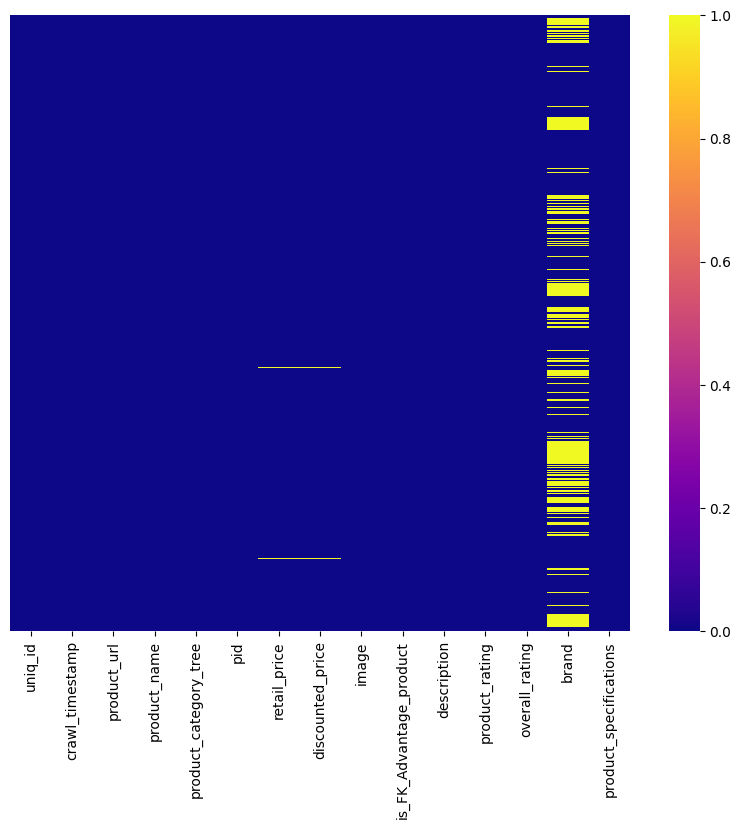

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), yticklabels=False, cmap='plasma', cbar=True)

Dropping rows where description is missing

In [34]:
df.dropna(axis=0, inplace=True)

In [35]:
df = df.reset_index(drop=True)

In [36]:
df.shape

(14058, 15)

<Axes: xlabel='brand'>

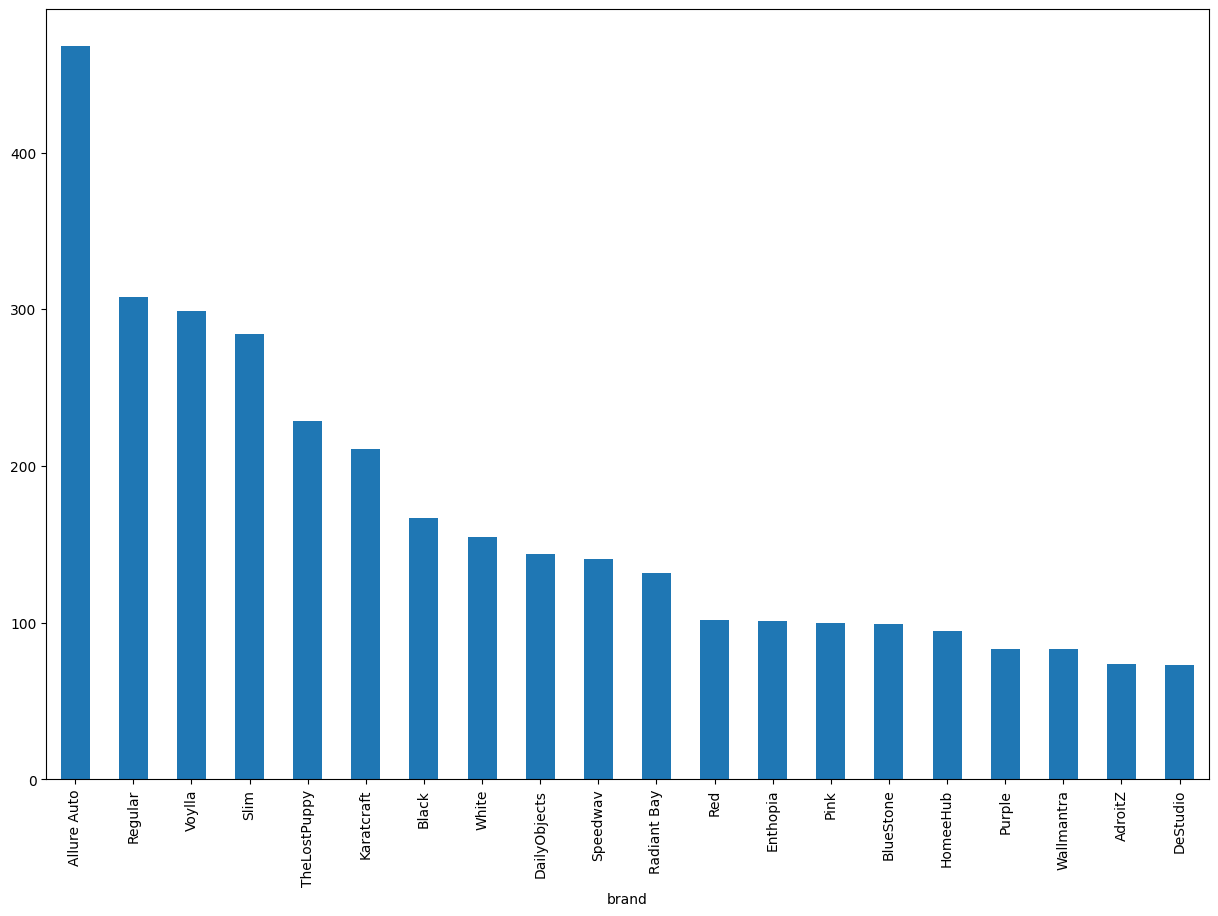

In [37]:
# plotting the no of occurances of 20 most frequent brands
df['brand'].value_counts().nlargest(20).plot(kind='bar', figsize=(15, 10))

**Data Cleaning**- Selecting Relevant Column

In [38]:
rel_cols=["product_name","product_category_tree","description","product_rating", "overall_rating","brand","product_specifications"]

In [39]:
# Preprocess the text data
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    return tokens

In [40]:
ls=[]
for i in range(len(df['pid'])):
  s=""
  for j in rel_cols:
    s+=str(df[j][i])
    s+=" "
  ls.append(s)
df['relevent_content']=ls
df['tokens'] = df['relevent_content'].dropna().apply(preprocess_text)


In [41]:
print(df['tokens'])

0        [alisha, solid, womens, cycling, shorts, cloth...
1        [fabhomedecor, fabric, double, sofa, bed, furn...
2        [aw, bellies, footwear, womens, footwear, ball...
3        [alisha, solid, womens, cycling, shorts, cloth...
4        [sicons, all, purpose, arnica, dog, shampoo, p...
                               ...                        
14053    [walldesign, small, vinyl, sticker, baby, care...
14054    [wallmantra, large, vinyl, stickers, sticker, ...
14055    [elite, collection, medium, acrylic, sticker, ...
14056    [elite, collection, medium, acrylic, sticker, ...
14057    [elite, collection, medium, acrylic, sticker, ...
Name: tokens, Length: 14058, dtype: object


#Retrieval System to query relevant products

**METHOD-1 (USING TF-IDF)**

In [42]:
!pip install scikit-learn

In [43]:
!pip install ipywidgets
import ipywidgets as widgets
from IPython.display import display
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [44]:
# Combine relevant content into a single column
def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

df['relevant_content'] = df[rel_cols].fillna('').agg(' '.join, axis=1).apply(preprocess_text)

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the descriptions
tfidf_matrix = vectorizer.fit_transform(df['relevant_content'])

In [46]:
def find_similar_products_tfidf(query, vectorizer, tfidf_matrix, df, top_n=5):
    query_vector = vectorizer.transform([query])
    similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Add similarity scores to dataframe
    df['similarity'] = similarities

    # Filter products with similarity greater than 0.30
    similar_products = df[df['similarity'] > 0.30].sort_values(by='similarity', ascending=False).head(top_n)

    return similar_products[['pid', 'product_name', 'description', 'similarity']]

In [47]:
query_widget = widgets.Text(
    description='Query:',
    placeholder='Enter a product query'
)

output_widget = widgets.Output()

def on_button_click(b):
    with output_widget:
        output_widget.clear_output()
        query = query_widget.value
        if query:
            similar_products = find_similar_products_tfidf(query, vectorizer, tfidf_matrix, df, top_n=5)
            if not similar_products.empty:
                display(similar_products)
            else:
                print('No similar products found.')

button = widgets.Button(description="Find Similar Products")
button.on_click(on_button_click)

display(query_widget, button, output_widget)


Text(value='', description='Query:', placeholder='Enter a product query')

Button(description='Find Similar Products', style=ButtonStyle())

Output()

**METHOD-2 ( USING WORD2VEC)**

In [48]:
!pip install gensim
from gensim.models import Word2Vec
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, sg=0)

In [49]:
import numpy as np

def get_embedding(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Generate embeddings for each product
df['embedding'] = df['tokens'].apply(lambda x: get_embedding(x, model))


In [50]:
print(df['embedding'])

0        [0.011918508, 0.29599163, -0.6003335, 0.481347...
1        [-0.44925025, -0.112473816, -0.010569463, -0.2...
2        [-0.29548812, 0.037894282, -0.12898993, 0.4493...
3        [0.014272673, 0.29884905, -0.60099953, 0.49306...
4        [-0.009215696, 0.41455612, 0.13061237, 0.07583...
                               ...                        
14053    [0.42607376, 0.016069347, 0.13940713, 0.827975...
14054    [0.04623364, -0.008258168, -0.00830457, 0.6642...
14055    [-0.043821048, 0.06799417, 0.18430513, 0.74208...
14056    [-0.07181757, 0.059783738, 0.1719839, 0.751047...
14057    [-0.06250978, 0.06779833, 0.16484667, 0.735862...
Name: embedding, Length: 14058, dtype: object


In [52]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
def get_query_embedding(query, model):
    tokens = preprocess_text(query)
    return get_embedding(tokens, model)

def find_similar_products(query, df, model, top_n=5, similarity_threshold=0.30):
    query_embedding = get_query_embedding(query, model)

    # Calculate cosine similarities
    df['similarity'] = df['embedding'].apply(lambda x: cosine_similarity([query_embedding], [x])[0][0])

    # Filter based on similarity_threshold
    filtered_df = df[df['similarity'] >= similarity_threshold]

    # Get top_n similar products
    similar_products = filtered_df.sort_values(by='similarity', ascending=False).head(top_n)

    # Return relevant columns
    return similar_products[['pid', 'product_name', 'description', 'similarity']]

In [53]:
# Widgets and button setup
query_widget = widgets.Text(
    description='Query:',
    placeholder='Enter a product query'
)

# Create output widget
output_widget = widgets.Output()

def on_button_click(b):
    with output_widget:
        output_widget.clear_output()
        query = query_widget.value
        if query:
            similar_products = find_similar_products(query, df, model, top_n=5, similarity_threshold=0.30)
            if not similar_products.empty:
                display(similar_products)
            else:
                print('No similar products found.')

# Create button widget
button = widgets.Button(description="Find Similar Products")
button.on_click(on_button_click)

# Display widgets
display(query_widget, button, output_widget)

Text(value='', description='Query:', placeholder='Enter a product query')

Button(description='Find Similar Products', style=ButtonStyle())

Output()

**METHOD-3 Lemmatization Approach (Further Optimization of word2vec)**

In [54]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download the necessary NLTK data files
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Lowercase text
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize text
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Apply lemmatization
    return lemmatized_tokens

# Apply preprocessing and tokenization to the relevant content
df['tokens'] = df['relevent_content'].dropna().apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [55]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Update the model training and embedding generation
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, sg=0)

def get_embedding(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

df['embedding'] = df['tokens'].apply(lambda x: get_embedding(x, model))

def get_query_embedding(query, model):
    tokens = preprocess_text(query)
    return get_embedding(tokens, model)

def find_similar_products(query, df, model, top_n=5):
    query_embedding = get_query_embedding(query, model)
    df['similarity'] = df['embedding'].apply(lambda x: cosine_similarity([query_embedding], [x])[0][0])
    similar_products = df.sort_values(by='similarity', ascending=False).head(top_n)
    return similar_products[['pid', 'product_name', 'description', 'similarity']]


In [57]:
query_widget = widgets.Text(
    description='Query:',
    placeholder='Enter a product query'
)

# Create output widget
output_widget = widgets.Output()

def on_button_click(b):
    with output_widget:
        output_widget.clear_output()
        query = query_widget.value
        if query:
            similar_products = find_similar_products(query, df, model, top_n=5)
            if not similar_products.empty:
                display(similar_products)
            else:
                print('No similar products found.')

# Create button widget
button = widgets.Button(description="Find Similar Products")
button.on_click(on_button_click)

# Display widgets
display(query_widget, button, output_widget)

Text(value='', description='Query:', placeholder='Enter a product query')

Button(description='Find Similar Products', style=ButtonStyle())

Output()

**METHOD-4 (MULTI LINGUAL)**

In [3]:
!pip install googletrans==4.0.0-rc1
from googletrans import Translator

In [58]:
# Initialize Google Translate API
translator = Translator()

def translate_query(query, target_language='en'):
    # Translate the query to the target language (default is English)
    translation = translator.translate(query, dest=target_language)
    return translation.text

ls = []
for i in range(len(df)):
    s = ""
    for j in rel_cols:
        s += str(df[j][i]) + " "
    ls.append(s)
df['relevant_content'] = ls
df['tokens'] = df['relevant_content'].dropna().apply(preprocess_text)

# Train a Word2Vec model
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, sg=0)

def get_embedding(tokens, model):
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

# Generate embeddings for each product
df['embedding'] = df['tokens'].apply(lambda x: get_embedding(x, model))

def get_query_embedding(query, model):
    tokens = preprocess_text(query)
    return get_embedding(tokens, model)

def find_similar_products(query, df, model, top_n=5):
    translated_query = translate_query(query)  # Translate the query to English
    query_embedding = get_query_embedding(translated_query, model)

    # Calculate cosine similarities
    df['similarity'] = df['embedding'].apply(lambda x: cosine_similarity([query_embedding], [x])[0][0])

    # Get top_n similar products
    similar_products = df[df['similarity'] > 0.30].sort_values(by='similarity', ascending=False).head(top_n)

    # Return relevant columns
    return similar_products[['pid', 'product_name', 'description', 'similarity']]


In [59]:
# Create input and output widgets
query_widget = widgets.Text(description='Query:', placeholder='Enter a product query')
output_widget = widgets.Output()

def on_button_click(b):
    with output_widget:
        output_widget.clear_output()
        query = query_widget.value
        if query:
            similar_products = find_similar_products(query, df, model, top_n=5)
            if not similar_products.empty:
                display(similar_products)
            else:
                print('No similar products found.')

button = widgets.Button(description="Find Similar Products")
button.on_click(on_button_click)

display(query_widget, button, output_widget)

Text(value='', description='Query:', placeholder='Enter a product query')

Button(description='Find Similar Products', style=ButtonStyle())

Output()